In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from SpecAugment import spec_augment_tensorflow

from src.config import c
from src.generator import Generator
from src.services import get_msg_provider, get_wave_provider

import librosa

wave_p = get_wave_provider(c)
c["MSG_POWER_TO_DB"] = True
msg_p = get_msg_provider(c)


generator = Generator(
    df=pd.read_pickle("/app/_work/dataset-C.pickle"),
    shuffle=False,
    augmentation=None,
    rating_as_sw=False,
    rareness_as_sw=False,
    msg_provider=msg_p,
    wave_provider=wave_p,
    msg_output_size=(256, 256),
    msg_power=3,
    batch_size=10,
)

generator._shuffle_samples()
x, _, _ = generator.__getitem__(0)
msgs = x["i_msg"]
msgs.shape

In [48]:
x = msgs[..., np.newaxis]
while True:
    w = spec_augment_tensorflow.sparse_warp(
        mel_spectrogram=x
    )

InvalidArgumentError: Input matrix is not invertible. [Op:MatrixSolve]

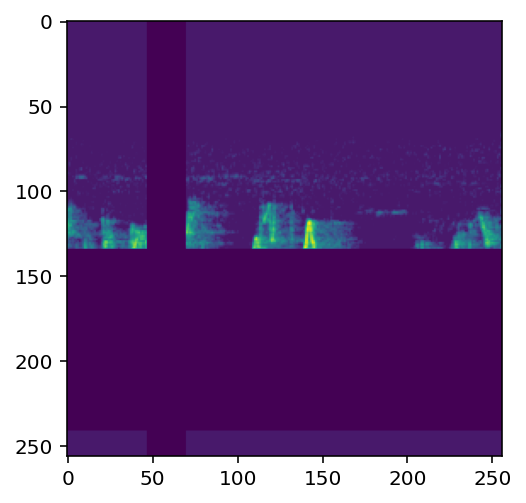

In [29]:
plt.imshow(w.numpy()[0][:, :, 0])

In [7]:
i

4

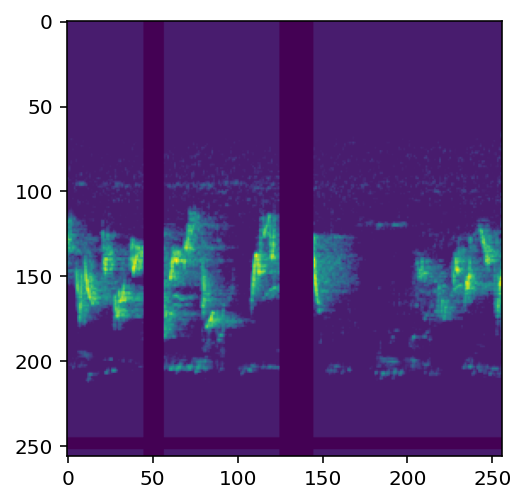

In [42]:
w = spec_augment_tensorflow.spec_augment(
    mel_spectrogram=msgs[..., np.newaxis]
)

plt.imshow(w.numpy()[0][:, :, 0])

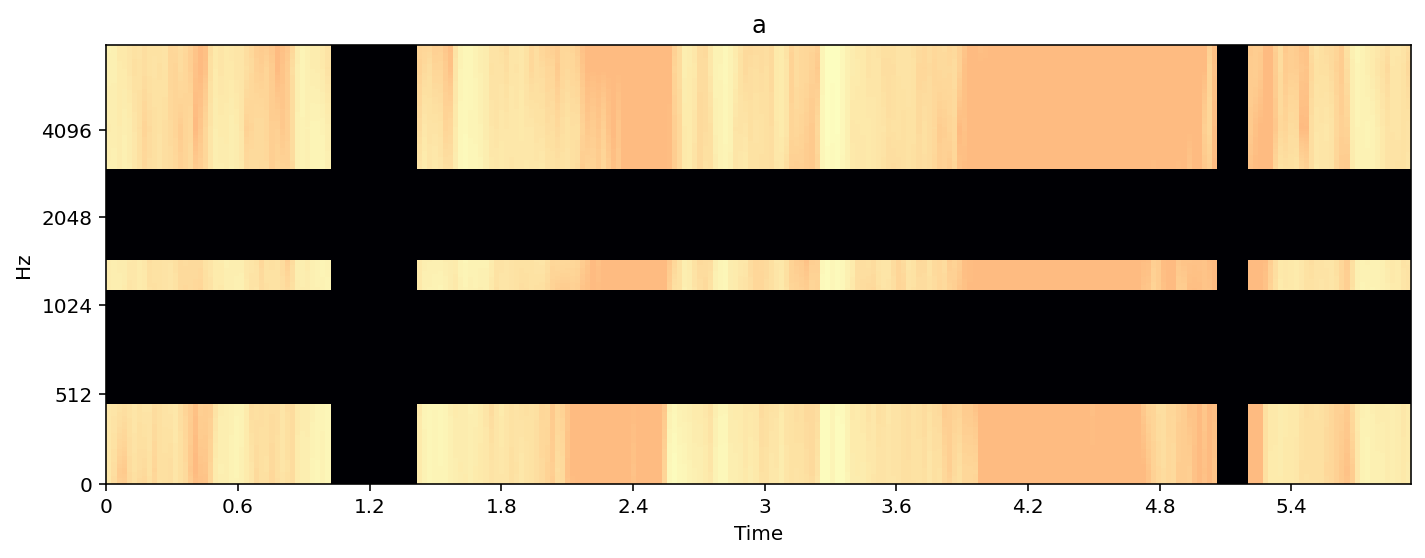

In [37]:
spec_augment_tensorflow.visualization_spectrogram(w, 'a')